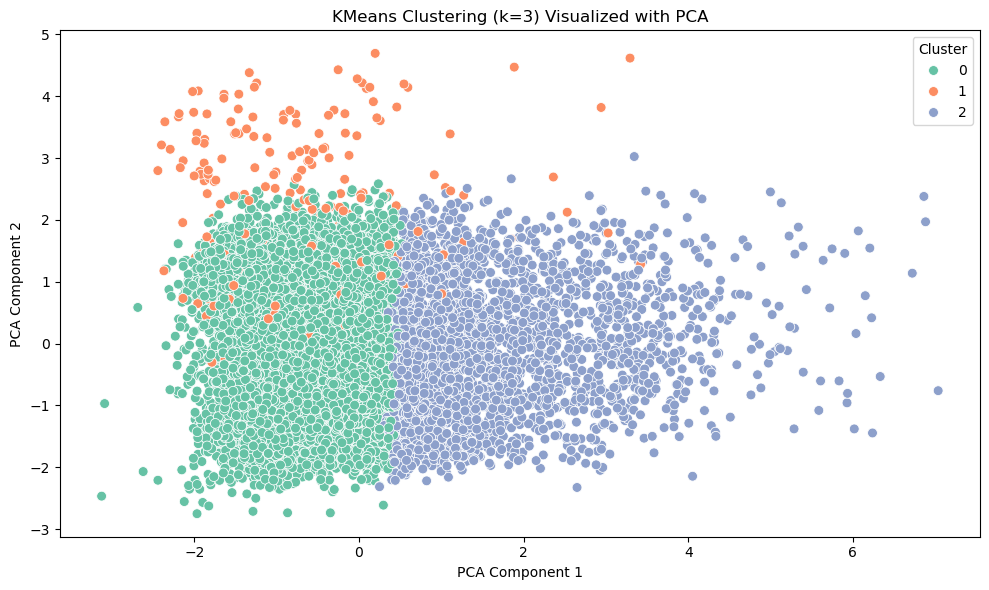

In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/bryan/Desktop/Employee_Project/train.csv")

#drop id and promoted
df_clustering = df.drop(columns=['employee_id', 'is_promoted'])

#sample data
df_sample = df_clustering.sample(n=10000, random_state=42)

#seperate features for data transformations
categorical_cols = df_sample.select_dtypes(include='object').columns.tolist()
numerical_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

#preprocessing pipelines
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#processor
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols)
])

#fit data to be transformed
X_processed = preprocessor.fit_transform(df_sample)

#K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)

#add cluster labels
df_sample['cluster'] = clusters

#visualiz clusters with PCA due to data being in more than 3 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=50)
plt.title(f'KMeans Clustering (k={k}) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



In [23]:
centers = kmeans.cluster_centers_

In [15]:
#group by cluster to find the means values for the various features

df_sample.groupby('cluster').mean(numeric_only=True)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
cluster,,,,,,
0,1.296821,30.924190,3.318867,4.005671,0.0,64.634084
1,1.153153,34.117117,3.432836,4.599099,1.0,69.193694
2,1.138122,43.071173,3.359766,9.858954,0.0,60.440689


In [30]:
text = """0 High training scores, few years of service, not many awards
1 Mid-level experience, moderate training scores, some awards
2 Long-tenured employees, low training scores, often promoted before"""

print(text)


0 High training scores, few years of service, not many awards
1 Mid-level experience, moderate training scores, some awards
2 Long-tenured employees, low training scores, often promoted before
